In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Project Samples/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
df.drop_duplicates(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Feature Engineering / Processing of data

In [6]:
# Map species to numerical values
df['species'] = df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


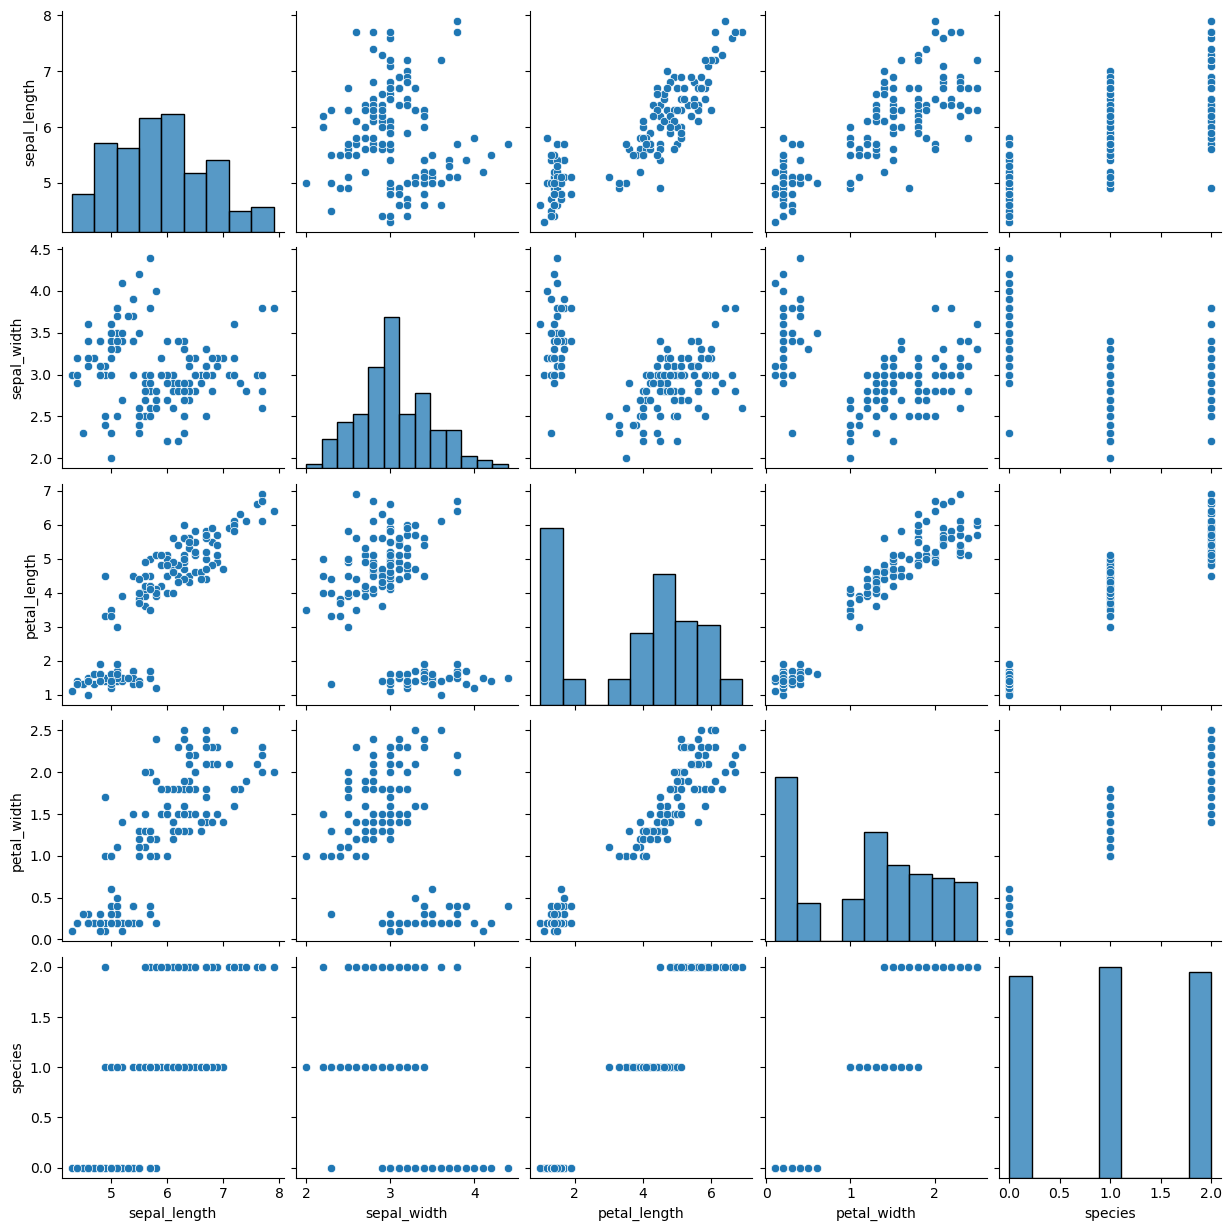

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
corr= df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


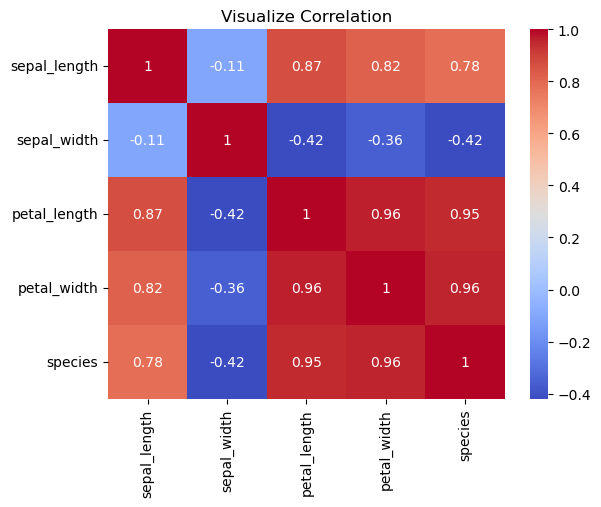

In [9]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Visualize Correlation')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

#Features and target variable
X = df.drop('species',axis=1)
y = df['species']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# import the logisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression
#initialize the logistic Regression model
logistic_model = LogisticRegression()

#Fit the model to the training data (X_train and y_train)
logistic_model.fit(X_train, y_train)

LogisticRegression()

### Validating Logistic Regression

In [12]:
# Predict the target variable from the test data (X_test)
y_pred_logistic = logistic_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.9333333333333333


In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
X=df[['sepal_length','petal_length', 'petal_width']]
y=df['species']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# import the logisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression

#initialize the logistic Regression model
logistic_model = LogisticRegression()

#Fit the model to the training data (X_train and y_train)
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred_logistic = logistic_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.9333333333333333


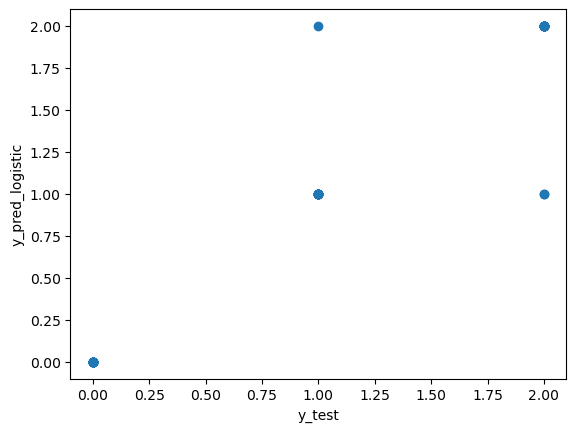

In [19]:
plt.scatter(y_test,y_pred_logistic)
plt.xlabel('y_test')
plt.ylabel('y_pred_logistic')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

#Features and target variable
X = df.drop('species',axis=1)
y = df['species']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rmPredict = rm.predict(X_test)

In [23]:
print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, rmPredict))

Logistic Regression Results:
Accuracy: 0.9555555555555556


In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(4)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
knPredict = kn.predict(X_test)

In [26]:
print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, knPredict))

Logistic Regression Results:
Accuracy: 0.9555555555555556


In [27]:
from sklearn.svm import SVC
esvisi=SVC()
esvisi.fit(X_train, y_train)

SVC()

In [28]:
esvisiPredict = esvisi.predict(X_test)

In [29]:
print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, esvisiPredict))

Logistic Regression Results:
Accuracy: 0.9555555555555556


## Assembling different models

In [ ]:
from sklearn.ensemble import VotingClassifier
